In [1]:
import pandas as pd

In [3]:
df_female = pd.read_csv('female.csv', usecols=['Heightin', 'Weightlbs', 'chestcircumference', 'waistcircumference'])

In [4]:
df_female.head()

,chestcircumference,waistcircumference,Heightin,Weightlbs
0,922,850,61,142
1,839,708,64,120
2,874,727,68,147
3,1008,923,66,175
4,1089,1163,63,195


In [5]:
df_female['Heightin'] = df_female['Heightin'].multiply(2.54)
df_female['Weightlbs'] = df_female['Weightlbs'].multiply(0.45359237)
df_female['chestcircumference'] = df_female['chestcircumference'].multiply(0.1)
df_female['waistcircumference'] = df_female['waistcircumference'].multiply(0.1)

In [10]:
df_female.rename(columns={"chestcircumference": "chest", "waistcircumference": "waist", "Heightin": "height", "Weightlbs": "weight"}, inplace=True)

In [11]:
size = []
color = []

for chest, waist in zip(df_female['chest'], df_female['waist']):
    if chest <= 89:
        if waist >= 68:
            size.append('S')
            color.append('red')
        else:
            size.append('XS')
            color.append('blue')
    elif chest <= 99:
        if waist >= 78:
            size.append('L')
            color.append('yellow')
        else:
            size.append('M')
            color.append('green')
    elif chest <= 104:
        if waist >= 83:
            size.append('XL')
            color.append('purple')
        else:
            size.append('L')
            color.append('yellow')

df_female['size'] = pd.Series(size)
df_female['color'] = pd.Series(color)

In [12]:
df_female.head()

,chest,waist,height,weight,size,color
0,92.2,85.0,154.94,64.410117,L,yellow
1,83.9,70.8,162.56,54.431084,S,red
2,87.4,72.7,172.72,66.678078,S,red
3,100.8,92.3,167.64,79.378665,XL,purple
4,108.9,116.3,160.02,88.450512,XL,purple


In [16]:
df_female.to_csv('female_cleaned.csv')

In [26]:
df_male.rename(columns={"chestcircumference": "chest", "waistcircumference": "waist", "Heightin": "height", "Weightlbs": "weight"}, inplace=True)

In [21]:
df_male['Heightin'] = df_male['Heightin'].multiply(2.54)
df_male['Weightlbs'] = df_male['Weightlbs'].multiply(0.45359237)
df_male['chestcircumference'] = df_male['chestcircumference'].multiply(0.1)
df_male['waistcircumference'] = df_male['waistcircumference'].multiply(0.1)

In [22]:
df_male.head()

,chestcircumference,waistcircumference,Heightin,Weightlbs
0,107.4,93.3,180.34,81.646627
1,102.1,87.0,172.72,72.574779
2,112.0,96.4,172.72,92.986436
3,111.4,85.7,167.64,79.378665
4,104.8,86.8,195.58,96.615175


In [28]:
size = []
color = []

for chest, waist in zip(df_male['chest'], df_male['waist']):
    if chest <= 96:
        if waist >= 79:
            size.append('S')
            color.append('red')
        else:
            size.append('XS')
            color.append('blue')
    elif chest <= 106:
        if waist >= 89:
            size.append('L')
            color.append('yellow')
        else:
            size.append('M')
            color.append('green')
    elif chest <= 111:
        if waist >= 94:
            size.append('XL')
            color.append('purple')
        else:
            size.append('L')
            color.append('yellow')

df_male['size'] = pd.Series(size)
df_male['color'] = pd.Series(color)

In [33]:
df_male.drop(columns=['chest', 'waist'], inplace=True)

In [35]:
df_male.to_csv('male_cleaned.csv')

In [36]:
df_female = pd.read_csv('female_cleaned.csv')

In [37]:
df_female.head()

,Unnamed: 0,chest,waist,height,weight,size,color
0,0,92.2,85.0,154.94,64.410117,L,yellow
1,1,83.9,70.8,162.56,54.431084,S,red
2,2,87.4,72.7,172.72,66.678078,S,red
3,3,100.8,92.3,167.64,79.378665,XL,purple
4,4,108.9,116.3,160.02,88.450512,XL,purple


In [39]:
df_female.drop(columns=['Unnamed: 0', 'chest', 'waist'], inplace=True)

In [40]:
df_female.head()

,height,weight,size,color
0,154.94,64.410117,L,yellow
1,162.56,54.431084,S,red
2,172.72,66.678078,S,red
3,167.64,79.378665,XL,purple
4,160.02,88.450512,XL,purple


In [41]:
df_female.to_csv('female_cleaned.csv')

In [78]:
from math import sqrt

def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)


def get_neighbors(train, test_row, num_neighbors):
    entries = train.to_numpy()
    dis_values = list()
    for train_row in entries:
        dis = euclidean_distance(test_row, (train_row[0], train_row[1]))
        dis_values.append((train_row, dis))
    dis_values.sort(key=lambda tup: tup[1])
    list_neighbors = list()
    for i in range(num_neighbors):
        list_neighbors.append(dis_values[i][0])

    output_values = [row[-2] for row in list_neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

Your recommended size is: XS


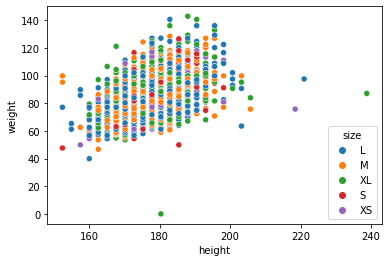

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

gender = input("Male or female ?")
height = input("Enter your height in cm: ")
waist = input("Enter your weight in kg: ")

dataframe = pd.read_csv('female_cleaned.csv') if gender.lower() == "female" else pd.read_csv('male_cleaned.csv')

recommended_size = get_neighbors(dataframe, [float(height), float(waist)], 3)
print(f"Your recommended size is: {recommended_size}")

sns.scatterplot(data=dataframe, x='height', y='weight', hue='size')
plt.show()